# Algorithmes de génération de dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import time

%run Algorithmes_de_Subsampling.ipynb

## Génère une distribution uniforme de n points dans le carré $[0,1]\times [0,1]$

In [2]:
def uniform_distribution(n):
    return [(random.uniform(0,1), random.uniform(0,1)) for _ in range(n)]

## Génère $c$ clusters dans lesquels sont distribués $k$ points uniforméments

In [3]:
def uniform_clusters(c,k):
    
    def limit(x): #This function assures that all points will be in the square [0,1]x[0,1]
        if x > 1:
            return 1
        if x < 0: 
            return 0
        else:
            return x
    
    centers = [(random.uniform(0,1), random.uniform(0,1)) for _ in range(c)] #On génère c centre
    radius = [random.uniform(1/(3*c),1/(2*c)) for _ in range(c)] #Un rayon entre 1/5c et 1/3c pour chacun d'eux
    points = []
    
    #Un génère k points uniformément dans chaque disque de centre et rayon calculé précedemment
    for i in range(c):
        for j in range(k):
            t = random.uniform(0,2*np.pi)
            d = random.uniform(0,radius[i])
            points.append((limit(centers[i][0]+d*np.cos(t)),limit(centers[i][1]+d*np.sin(t))))
        
    return points

## Test d'égalité des quatre algorithmes de subsampling

In [4]:
def Exp_subsampling(points, title, motif):
    # Unzip the points into two lists, xs and ys
    xs, ys = zip(*points)

    # Plot the points
    plt.plot(xs, ys, motif)
    plt.title(title)

### Egalité sur une distribution uniforme

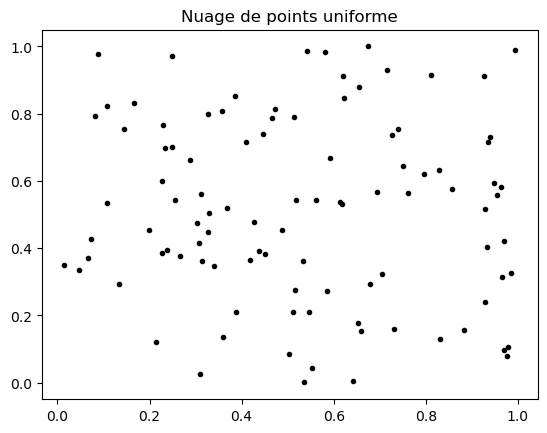

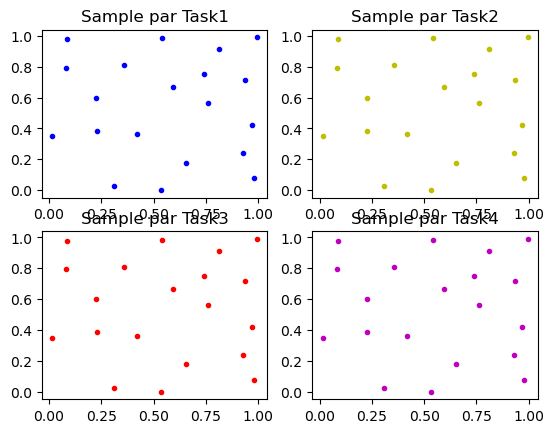

In [5]:
P = uniform_distribution(100)
P1 = P.copy()
P2 = P.copy()
P3 = P.copy()
P4 = P.copy()

Exp_subsampling(P, "Nuage de points uniforme",'k.')
plt.show()

plt.subplot(2,2,1)
Exp_subsampling(Task1(P1,P1[0],20), "Sample par Task1", 'b.')
plt.subplot(2,2,2)
Exp_subsampling(Task2(P2,P2[0],20), "Sample par Task2", 'y.')
plt.subplot(2,2,3)
Exp_subsampling(Task3(P3,P3[0],20), "Sample par Task3", 'r.')
plt.subplot(2,2,4)
Exp_subsampling(Task4(P4,P4[0],20), "Sample par Task4", 'm.')

### Egalité sur une distribution en clusters

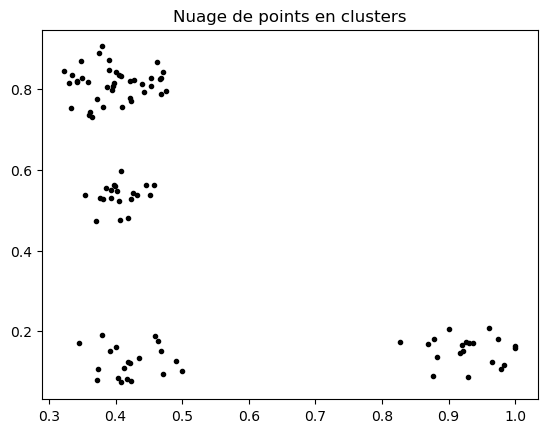

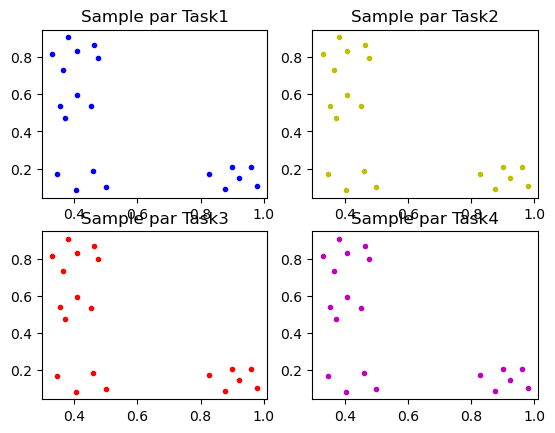

In [6]:
C = uniform_clusters(5,20)
C1 = C.copy()
C2 = C.copy()
C3 = C.copy()
C4 = C.copy()

Exp_subsampling(C, "Nuage de points en clusters",'k.')
plt.show()

plt.subplot(2,2,1)
Exp_subsampling(Task1(C1,C1[0],20), "Sample par Task1", 'b.')
plt.subplot(2,2,2)
Exp_subsampling(Task2(C2,C2[0],20), "Sample par Task2", 'y.')
plt.subplot(2,2,3)
Exp_subsampling(Task3(C3,C3[0],20), "Sample par Task3", 'r.')
plt.subplot(2,2,4)
Exp_subsampling(Task4(C4,C4[0],20), "Sample par Task4", 'm.')

# Comparaison de performance entre les différents algorithmes

In [7]:
"""Mesure le temps d'exécution d'une fonction de sample f de paramètre P,p,k"""
def time_mesure(f,P,p,k): 
    
    t_start = time.process_time_ns()
    graph = f(P,p,k)
    t_end = time.process_time_ns()
    
    return t_end-t_start

In [8]:
def plot_y_z_vs_x(x, y, title, motif):
    # Create two subplots

    # Plot y vs x on the first subplot
    plt.plot(x, y, motif)
    plt.title(title)
    plt.xlabel('k')
    #axs[0].set_ylabel('y')
    #axs[0].legend()
    plt.grid(True)


    # Adjust layout
    plt.tight_layout()
    plt.show()

## Task1 vs. Task2

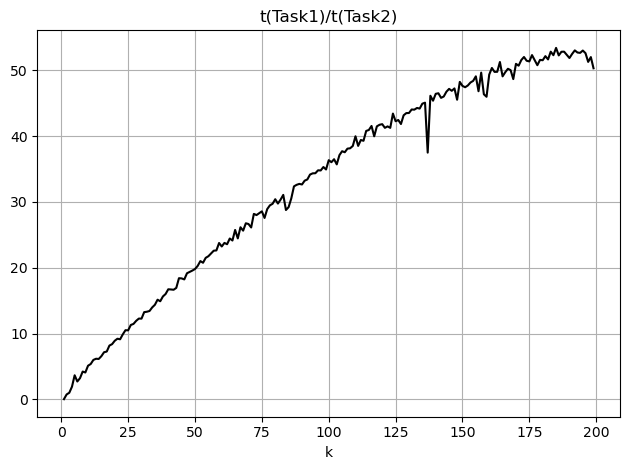

In [9]:
ratio = []

for i in range(1,200):
    
    P = uniform_distribution(200)
    Pc = P.copy()
    t1 = time_mesure(Task1,P,P[0],i)
    t2 = time_mesure(Task2,Pc,Pc[0],i)
    
    ratio.append(t1/t2)
    
x = [i for i in range(1,200)]
plot_y_z_vs_x(x, ratio, "t(Task1)/t(Task2)",'k-')

## Task2 vs. Task3

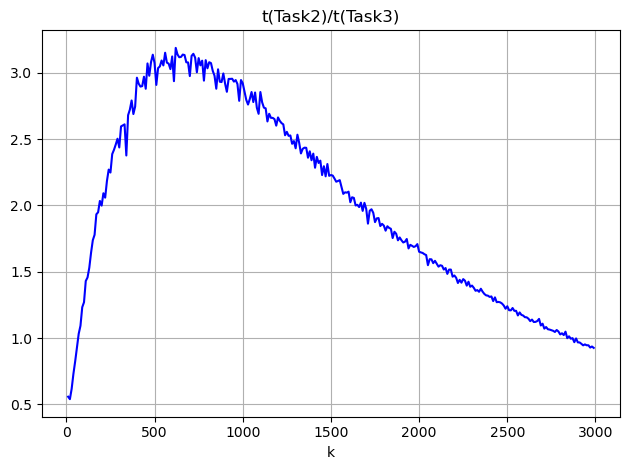

In [10]:
ratio = []

for i in range(1,300):
    
    P = uniform_distribution(3000)
    Pc = P.copy()
    t2 = time_mesure(Task2,P,P[0],i*10)
    t3 = time_mesure(Task3,Pc,Pc[0],i*10)
    
    ratio.append(t2/t3)
    
x = [i*10 for i in range(1,300)]
plot_y_z_vs_x(x, ratio, "t(Task2)/t(Task3)",'b-')